# Inferential statistics II - Bootstrapping

In [4]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import stats
from scipy.stats import norm

## Medical charge data set

In [5]:
med_charges = pd.read_csv('data/insurance2.csv')

In [6]:
charges = med_charges['charges']
med_charges.head()


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__

In [8]:
np.random.seed(47)
N_rep = 10000
sample_mean = []
for i in range(10000): 
    sample = np.random.choice(charges, size=len(charges)).mean()
    sample_mean.append(sample)

print(np.percentile(sample_mean, 5))

12724.467921704


If you performed 10000 replicates immediately after setting the random seed to 47, you should get the value 12724 here, which compares very well with the value 12725 obtained using the _t_-distribution confidence interval previously. It is a most pleasant result to see the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A:__

In [9]:
insured = med_charges.loc[med_charges['insuranceclaim']==1]
non_insured = med_charges.loc[med_charges['insuranceclaim']==0]
charges_insured = insured['charges']
charges_non_insured = non_insured['charges']
print(charges_insured.describe())
print(charges_non_insured.describe())

count      783.000000
mean     16423.928277
std      14045.928419
min       1131.506600
25%       5733.288925
50%      11538.421000
75%      23484.788875
max      63770.428010
Name: charges, dtype: float64
count      555.000000
mean      8821.421892
std       6446.510127
min       1121.873900
25%       4445.337575
50%       6933.242250
75%      11424.211575
max      36910.608030
Name: charges, dtype: float64


In [16]:
np.random.seed(47)
N_rep = 10000
std_diff_list = []

for i in range(N_rep): 
    sample1_std = np.random.choice(charges_insured, size=len(charges_insured)).std()
    sample2_std = np.random.choice(charges_non_insured, size=len(charges_non_insured)).std()
    std_diff = sample1_std - sample2_std
    std_diff_list.append(std_diff)
print(np.percentile(std_diff_list, [2.5,97.5]))


[6681.572467   8502.74820416]


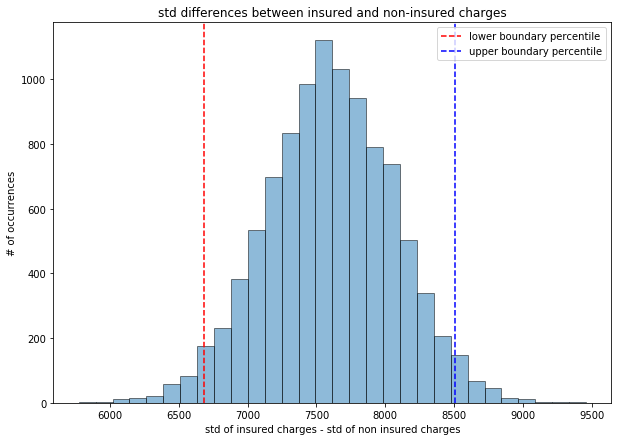

In [18]:
from pylab import rcParams
plt.hist(std_diff_list,bins=30, alpha=0.5, ec='black')
plt.title('std differences between insured and non-insured charges')
plt.xlabel('std of insured charges - std of non insured charges')
plt.ylabel('# of occurrences')
plt.axvline(np.percentile(std_diff_list,2.5), color='r', linestyle='dashed', label = 'lower boundary percentile')
plt.axvline(np.percentile(std_diff_list,97.5), color='b', linestyle='dashed', label = 'upper boundary percentile')
rcParams['figure.figsize'] = 12.5,10
plt.legend()
plt.show()


The null hypothesis states that the standard deviation of the insured group the same as the standard deviation of the non-insured group. The alternative hypothesis states that the insured group is charged more than the non-insured group and has a higher standard deviation.
Based on the standard deviation differences between insured and non-insured groups, I reject the null hypothesis as the distribution does not include zero as expected by the null hypothesis.

## Confidence interval and p-value

__A:____Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

In [23]:
np.random.seed(47)
N_rep = 10000

mean_diff_overall = []
sample1_mean_overall = []
sample2_mean_overall = []
for i in range(N_rep): 
    sample1_mean = np.random.choice(charges_insured, size=len(charges_insured)).mean()
    sample1_mean_overall.append(sample1_mean)
    sample2_mean = np.random.choice(charges_non_insured, size=len(charges_non_insured)).mean()
    sample2_mean_overall.append(sample2_mean)  
    mean_diff = sample1_mean - sample2_mean
    mean_diff_overall.append(mean_diff)
print(np.percentile(mean_diff_overall, [2.5,97.5]))   

[6500.3403758  8734.12810232]


In [24]:
stats.ttest_ind(sample1_mean_overall, sample2_mean_overall)

Ttest_indResult(statistic=1347.8709287760641, pvalue=0.0)

Null hypothesis: The mean of the charges for the insured data set does NOT have any statistical difference when compared to the mean of the charges for the non insured data set.

Alternative hypothesis: The mean of the charges for the insured data set DOES have a statistical difference when compared to the mean of charges for the non insured data set.

The null hypothesis is rejected because the p-value is <= 0.05 showing a result p-value = 0

We accept the alternative hypothesis.


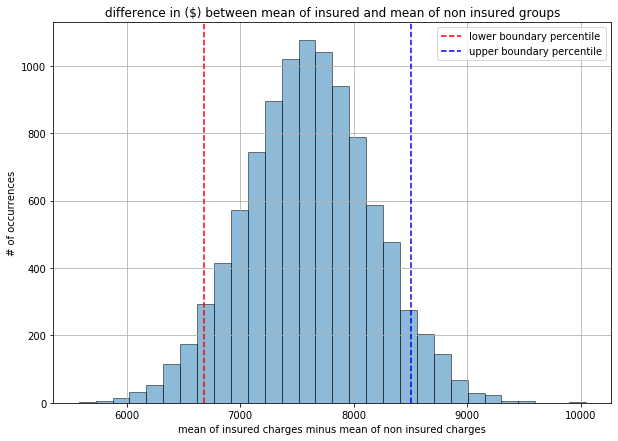

In [25]:
from pylab import rcParams
plt.hist(mean_diff_overall,bins=30, alpha=0.5, ec='black')
plt.grid(True)
plt.title('difference in ($) between mean of insured and mean of non insured groups')
plt.xlabel('mean of insured charges minus mean of non insured charges')
plt.ylabel('# of occurrences')
plt.axvline(np.percentile(std_diff_list,2.5), color='r', linestyle='dashed', label = 'lower boundary percentile')
plt.axvline(np.percentile(std_diff_list,97.5), color='b', linestyle='dashed', label = 'upper boundary percentile')
plt.legend()
plt.show()

__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

__A:__Because the histrogram shows the frequency of the observed differences. It shows the distribution of different possible outcomes in an experiment.

__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__bootstrap relicates allow us to work with a larger pool of data. I would perform bootstrap replicates when possible. The p-value that we obtained from the bootstrap replicates is 0 and is more defined answer.

__Q:__ Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

__A:__The Welch's t-test of two independent samples but of unknown variance:
scipy.stats.ttest_ind(equal_var=False)

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

__A:__The team is asking if the click-through rates are higher for algorithm B > A. In this case I would recommend a two sample one tailed test that shows if the click-through rates for algorithm B are higher than a certain threshold in relation to algorithm A.
The null hypothesis states that algorithms A >= B in click-through rates. 
The alternate hypothesis states that algorithm A < B in click-trough rates. The consequences would be that more resourves would be allocated to develop algorithm B.

# Learning outcomes

You've previously applied frequentist methods to calculate confidence intervals, p-values, and perform hypothesis tests. Frequentist methods use theoretical results to calculate what we expect would happen if experiments were to be run again and again and again. Now you've seen how you can do the same things using the bootstrap approach, which does not rely on such theory, and attendant assumptions, but instead literally does run experiments again and again and again.

In these exercises, you have:
* calculated the same confidence interval lower limit as you did previously
* tested the assumption that the variances of the two groups (insured vs. non-insured) were equal - something a bit harder to do using the frequentist method because of the nature of the sampling distribution for variance
* calculated the p-value for the difference between the means of the two groups and compared with the result obtained using the previous frequentist approach

You are now well equipped to apply the bootstrap approach to a wide variety of problems. Just think about what conditions you wish to recreate in your simulated reruns.